In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/whatsapp_cleaned_data.csv")
df.head()

,date,time,user,message
0,1/12/26,9:19 AM,User1,ML ka class ajj hai?
1,2/10/26,12:59 PM,User2,*Follow this link to Join the WhatsApp Group* ...
2,2/10/26,11:43 PM,User2,*Follow this link to Join the WhatsApp Group* ...
3,2/13/26,10:37 PM,User3,*TRAINING + INTERNSHIP PROGRAM* ...
4,2/18/26,12:23 AM,User2,*TRAINING + INTERNSHIP PROGRAM* ...


In [4]:
# fix data and time

df["datetime"] = pd.to_datetime(
    df["date"] + " " + df["time"],
    format="%m/%d/%y %I:%M %p",
    errors="coerce"
)

df = df.sort_values("datetime").reset_index(drop=True)
df.head()

,date,time,user,message,datetime
0,1/24/25,10:00 PM,User34,"Dear Students,",2025-01-24 22:00:00
1,2/12/25,1:08 PM,User34,📢 *Reminder: Sensitization Session on Global I...,2025-02-12 13:08:00
2,2/13/25,1:03 PM,User34,📢 *Reminder: Sensitization Session on Global I...,2025-02-13 13:03:00
3,2/14/25,9:43 PM,User18,"If not, reach as soon as possible.",2025-02-14 21:43:00
4,2/14/25,9:43 PM,User18,Hope all of you have reached your hostel.,2025-02-14 21:43:00


In [5]:
# basic exploratory analysis

total_messages = df.shape[0] # total messages
total_users = df["user"].nunique() # unique users
user_activity = df["user"].value_counts() # messages per user

print("Total Messages:", total_messages)
print("Total Users:", total_users)
print("\nMessages per User:\n", user_activity)

Total Messages: 978
Total Users: 188

Messages per User:
 user
User29     186
User33     161
User18      66
User34      55
User30      44
          ... 
User182      1
User184      1
User185      1
User186      1
User187      1
Name: count, Length: 188, dtype: int64


In [6]:
# Conversation Dynamics Analysis

df["msg_length"] = df["message"].apply(len) # message length
avg_length = df.groupby("user")["msg_length"].mean().sort_values(ascending=False)

df["time_diff"] = df["datetime"].diff().dt.total_seconds().fillna(0) # conversation starters 
conversation_starts = df[df["time_diff"] > 21600]["user"].value_counts()

print("Average Message Length per User:\n", avg_length)
print("\nConversation Starters:\n", conversation_starts)

Average Message Length per User:
 user
User133    379.000000
User62     243.000000
User3      229.000000
User130    172.000000
User2      147.666667
              ...    
User128      2.000000
User80       2.000000
User154      2.000000
User144      1.000000
User182      1.000000
Name: msg_length, Length: 188, dtype: float64

Conversation Starters:
 user
User34     38
User33     35
User29     22
User18     20
User30     12
User31      7
User36      6
User26      4
User20      2
User2       2
User35      1
User37      1
User1       1
User8       1
User10      1
User12      1
User4       1
User14      1
User15      1
User17      1
User38      1
User82      1
User63      1
User181     1
User137     1
Name: count, dtype: int64


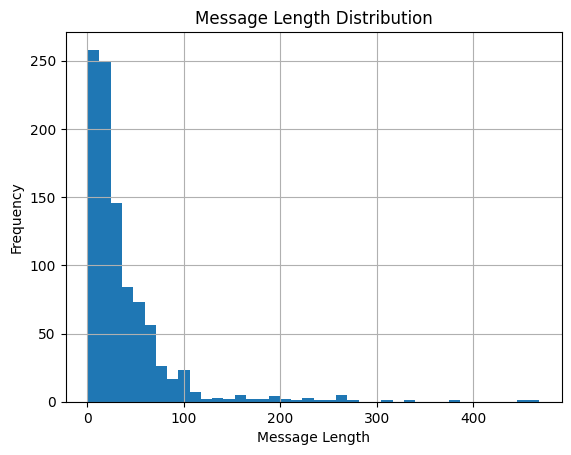

In [7]:
# message length distribution (behavior pattern)
# This shows communication style differences

import matplotlib.pyplot as plt

plt.figure()
df["msg_length"].hist(bins=40)

plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")

plt.show()

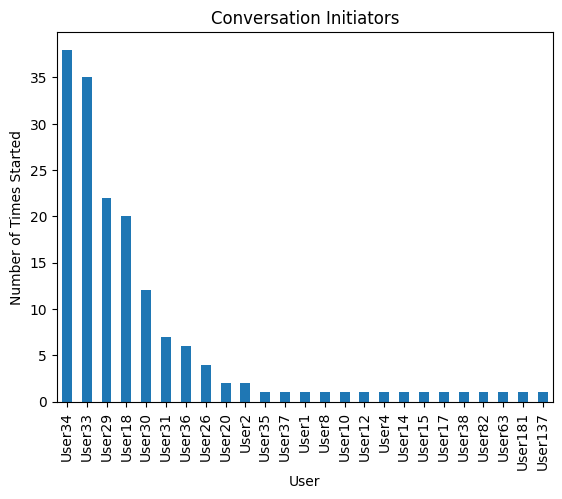

In [8]:
# conversation initiation chart
# shows who drives engagement 

plt.figure()
conversation_starts.plot(kind="bar")

plt.title("Conversation Initiators")
plt.xlabel("User")
plt.ylabel("Number of Times Started")

plt.show()

In [9]:
# shift user column to compare with next message
df["prev_user"] = df["user"].shift(1)

# response time only when user changes
df["response_time"] = df["datetime"].diff().dt.total_seconds()
response_df = df[df["user"] != df["prev_user"]]

# remove very large gaps (like overnight)
response_df = response_df[response_df["response_time"] < 3600]
avg_response = response_df.groupby("user")["response_time"].mean()

print("Average Response Time (seconds):\n", avg_response)

Average Response Time (seconds):
 user
User10       0.0
User100     60.0
User101     60.0
User102    480.0
User103      0.0
           ...  
User95      60.0
User96      60.0
User97     180.0
User98     180.0
User99      60.0
Name: response_time, Length: 176, dtype: float64


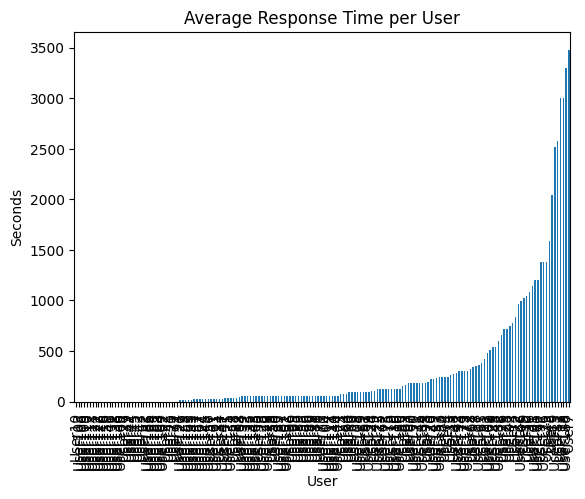

In [10]:
# response time analysis

import matplotlib.pyplot as plt

plt.figure()
avg_response.sort_values().plot(kind="bar")

plt.title("Average Response Time per User")
plt.xlabel("User")
plt.ylabel("Seconds")

plt.show()

In [13]:
# response only when user changes
response_df = df[df["user"] != df["prev_user"]].copy()

# calculate response time again
response_df["response_time"] = response_df["datetime"].diff().dt.total_seconds()

# remove invalid values
response_df = response_df[
    (response_df["response_time"] > 0) &
    (response_df["response_time"] < 7200)   # keep under 2 hours
]

avg_response = response_df.groupby("user")["response_time"].mean().dropna()

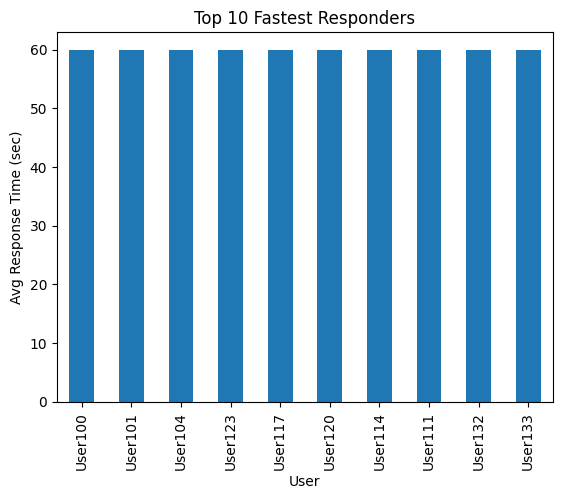

In [14]:
top_fast = avg_response.sort_values().head(10)

plt.figure()
top_fast.plot(kind="bar")

plt.title("Top 10 Fastest Responders")
plt.xlabel("User")
plt.ylabel("Avg Response Time (sec)")

plt.show()

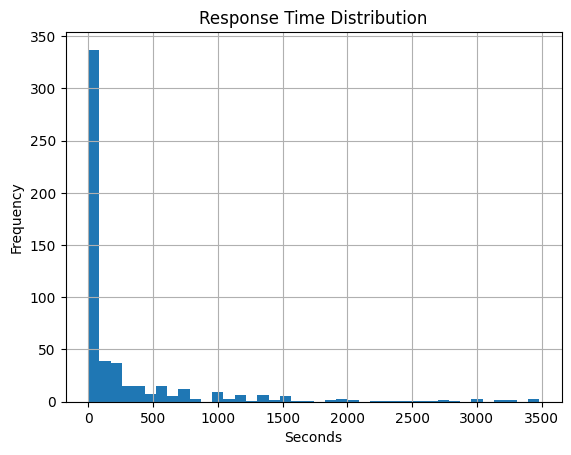

In [12]:
# response time distribution

plt.figure()
response_df["response_time"].hist(bins=40)

plt.title("Response Time Distribution")
plt.xlabel("Seconds")
plt.ylabel("Frequency")

plt.show()